# Glass_Identification_Prediction

### Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Documents\glass_price.csv')

In [3]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [5]:
# adding the first row since it was replaced by the names of column
df=df.append({'Id':1,'RI':1.52101,'Na':13.64,'Mg':4.49,
              'Al':1.1,'Si':71.78,'K':0.06,'Ca':8.75,'Ba':0,'Fe':0,'Type of glass':1},ignore_index=True)

In [6]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1.0
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0


In [9]:
df['Type']=df['Type of glass'].apply(lambda x:'window glass' if x<5 else 'non-window glass')

In [10]:
df.head(100)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1.0,window glass
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1.0,window glass
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1.0,window glass
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1.0,window glass
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1.0,window glass
...,...,...,...,...,...,...,...,...,...,...,...,...
95,97.0,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2.0,window glass
96,98.0,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2.0,window glass
97,99.0,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2.0,window glass
98,100.0,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2.0,window glass


In [11]:
df.Type.unique()

array(['window glass', 'non-window glass'], dtype=object)

In [12]:
df['glasstype']=df['Type'].apply(lambda x:1 if x=='window glass' else 0)

In [13]:
df.glasstype.unique()

array([1, 0], dtype=int64)

In [14]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type,glasstype
0,2.0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0,window glass,1
1,3.0,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0,window glass,1
2,4.0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1.0,window glass,1
3,5.0,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0,window glass,1
4,6.0,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0,window glass,1


In [15]:
df1=df.drop(columns=['Type of glass','Type']) #Dropping the columns from df and storing into df1

In [16]:
df1.shape

(214, 11)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         214 non-null    float64
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  glasstype  214 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 18.5 KB


In [18]:
df1.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glasstype
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.761682
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,1.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [19]:
df1.isnull().sum()

Id           0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
glasstype    0
dtype: int64

- Hence there is no null data in the glass identification dataset

In [20]:
df1.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Id,214.000000,107.500000,61.920648,1.000000,54.250000,107.500000,160.750000,214.000000
RI,214.000000,1.518365,0.003037,1.511150,1.516523,1.517680,1.519157,1.533930
Na,214.000000,13.407850,0.816604,10.730000,12.907500,13.300000,13.825000,17.380000
Mg,214.000000,2.684533,1.442408,0.000000,2.115000,3.480000,3.600000,4.490000
Al,214.000000,1.444907,0.499270,0.290000,1.190000,1.360000,1.630000,3.500000
Si,214.000000,72.650935,0.774546,69.810000,72.280000,72.790000,73.087500,75.410000
K,214.000000,0.497056,0.652192,0.000000,0.122500,0.555000,0.610000,6.210000
Ca,214.000000,8.956963,1.423153,5.430000,8.240000,8.600000,9.172500,16.190000
Ba,214.000000,0.175047,0.497219,0.000000,0.000000,0.000000,0.000000,3.150000
Fe,214.000000,0.057009,0.097439,0.000000,0.000000,0.000000,0.100000,0.510000


In [21]:
df1.dtypes

Id           float64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
glasstype      int64
dtype: object

- Here glasstype is the target variable. It is a categorical column as we have categorised into window class and non-window class. Hence this is a classification problem statement. 
- But given glass type as int64.
- So, we are converting the column type from int to object

In [22]:
df1['glasstype']=df1['glasstype'].astype(object)

In [23]:
df1.dtypes

Id           float64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
glasstype     object
dtype: object

- Hence we can see that glasstype has been changed

In [24]:
df1.nunique()

Id           214
RI           178
Na           142
Mg            94
Al           118
Si           133
K             65
Ca           143
Ba            34
Fe            32
glasstype      2
dtype: int64

### Visualization of the Data (EDA)

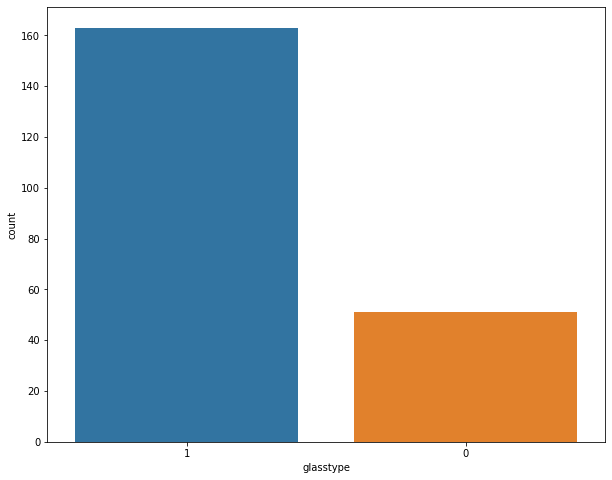

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='glasstype', data=df1, order=df1['glasstype'].value_counts().index);

- From the above countplot we find that 'window glass' are more than the 'non-window glass'

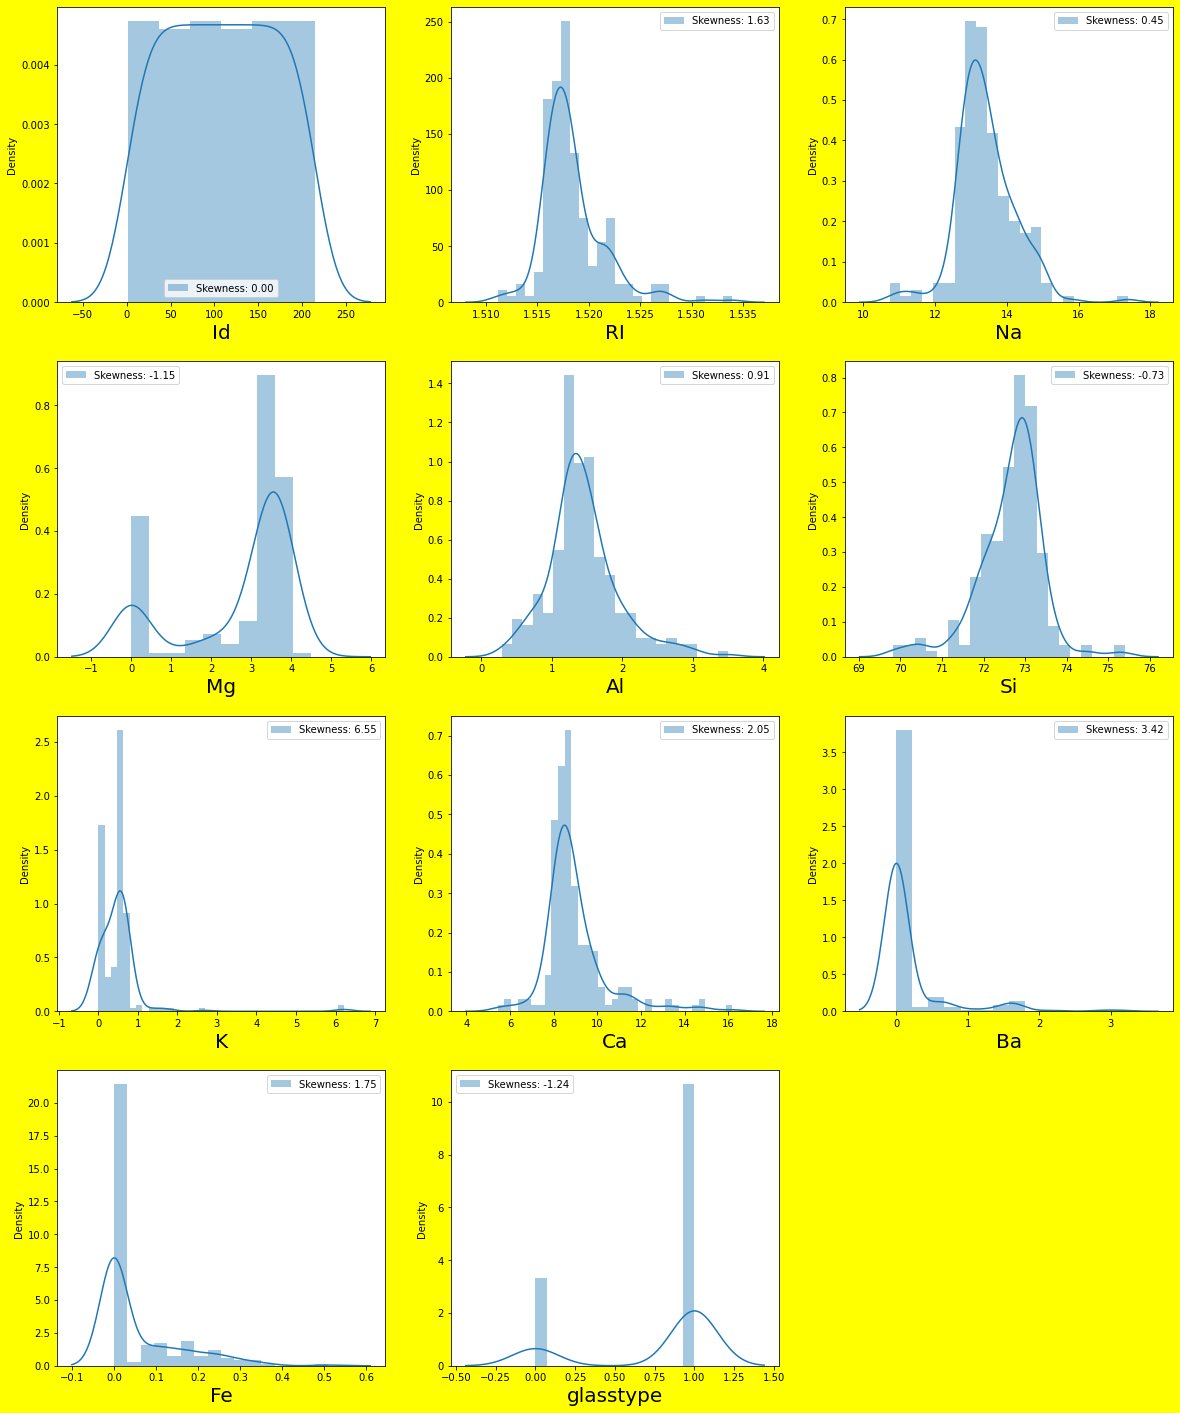

In [26]:
#Finding out the skewness in each column by plotting the distibution plot
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        t=sns.distplot(df1[column],label="Skewness: %.2f"%(df1[column].skew()))
        t.legend()
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distribution plots, we find that
- The columns Na,Si,Ca are bit skewed
- The columns Ri,K,Ba,Fe are right skewed
- the column Mg is left skewed

Generally,
- If the absolute value of skew<0.5 then very symmetric.
- If the absolute value of skew is in between 0.5 and 1 then slightly skewed
- If the absolute value of skew is greater than 1 then very skewed.

- From the above data, we find that absolute value of skewness is greater than 1 for Ri,K,Ca,Ba,Fe hence they are very skewed.
- We can handle that dat by following ways:
   - Log transform
   - Box cox transform
   - Square Root transform

- Applying transformations for handling the skewness in the columns.

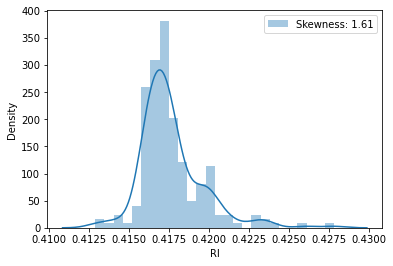

In [27]:
# Using Log Transform for Ri column

Log_Ri= df1["RI"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Ri,label="Skewness: %.2f"%(Log_Ri.skew()) )
t.legend()

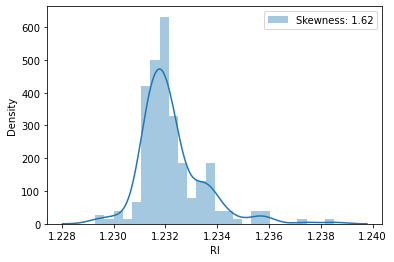

In [28]:
#Using Sqrt transform for Ri column

Sqrt_Ri= df1["RI"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Ri,label="Skewness: %.2f"%(Sqrt_Ri.skew()) )
t.legend()

- By applying transformations to Ri, we were able to reduce skewness from 1.63 to 1.61. Not too much reduction in skewness.

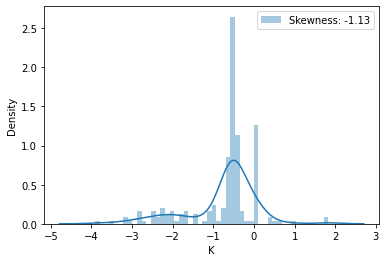

In [29]:
# Using Log Transform for K column

Log_K= df1["K"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_K,label="Skewness: %.2f"%(Log_K.skew()) )
t.legend()

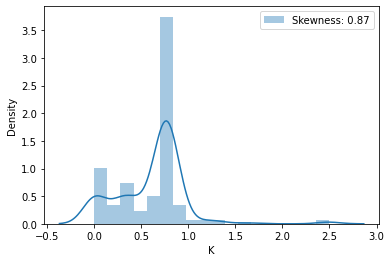

In [30]:
#Using sqrt transform for K column

Sqrt_K= df1["K"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_K,label="Skewness: %.2f"%(Sqrt_K.skew()) )
t.legend()

- By applying transformations to K, we were able to reduce skewness from 6.55 to 0.87 using sqrt transformation.There is much reduction in skewness.

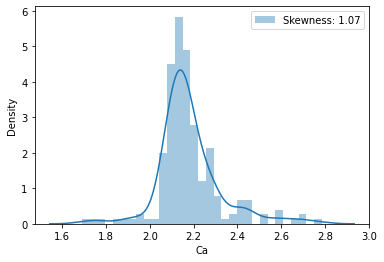

In [31]:
# Using Log Transform for Ca column

Log_Ca= df1["Ca"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Ca,label="Skewness: %.2f"%(Log_Ca.skew()) )
t.legend()

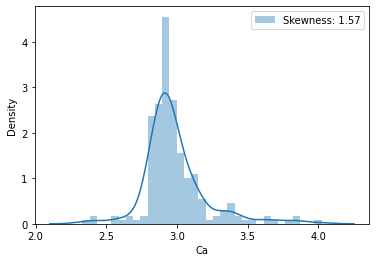

In [32]:
# Using Sqrt Transform for Ca column

Sqrt_Ca= df1["Ca"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Ca,label="Skewness: %.2f"%(Sqrt_Ca.skew()) )
t.legend()

- By applying transformations to Ca, we were able to reduce skewness from 2.05 to 1.07 using log transformation.There is reduction in skewness

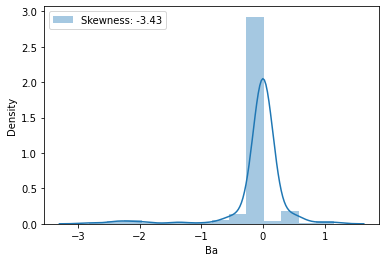

In [33]:
# Using Log Transform for Ba column

Log_Ba= df1["Ba"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Ba,label="Skewness: %.2f"%(Log_Ba.skew()) )
t.legend()

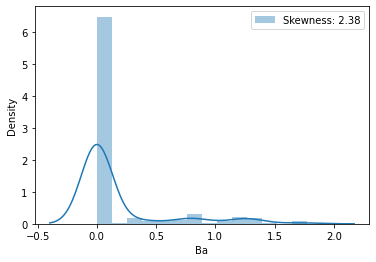

In [34]:
# Using Sqrt Transform for Ba column

Sqrt_Ba= df1["Ba"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Ba,label="Skewness: %.2f"%(Sqrt_Ba.skew()) )
t.legend()

- By applying transformations to Ba, we were able to reduce skewness from 3.42 to 2.38 using sqrt transformation.There is bit reduction in skewness

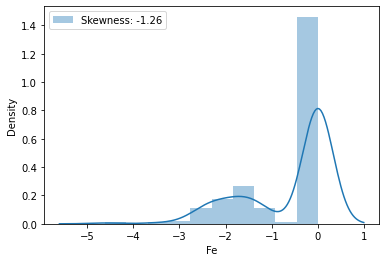

In [35]:
# Using Log Transform for Fe column

Log_Fe= df1["Fe"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Fe,label="Skewness: %.2f"%(Log_Fe.skew()) )
t.legend()

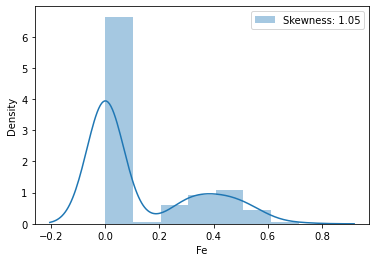

In [36]:
# Using Sqrt Transform for Fe column

Sqrt_Fe= df1["Fe"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_Fe,label="Skewness: %.2f"%(Sqrt_Fe.skew()) )
t.legend()

- By applying transformations to K, we were able to reduce skewness from 1.75 to 1.05 using sqrt transformation.There is reduction in skewness

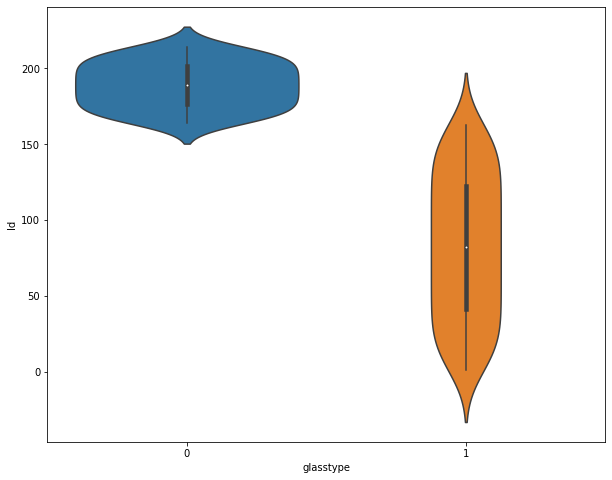

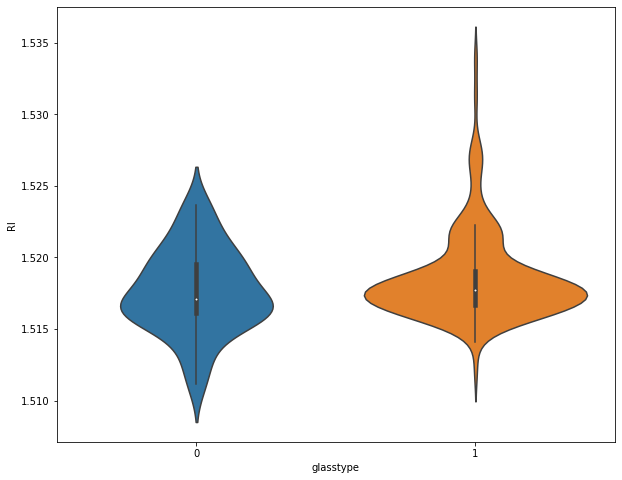

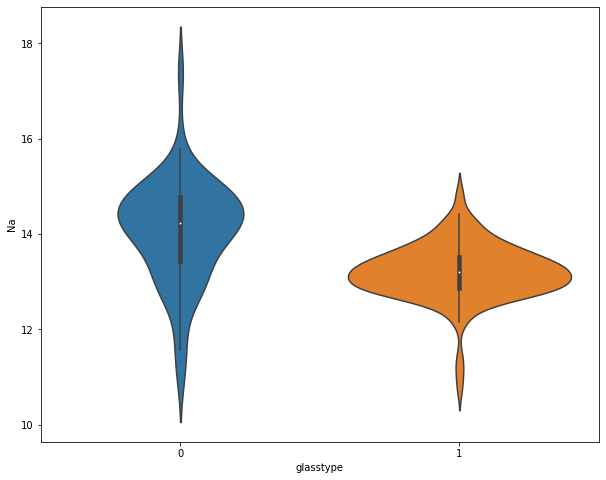

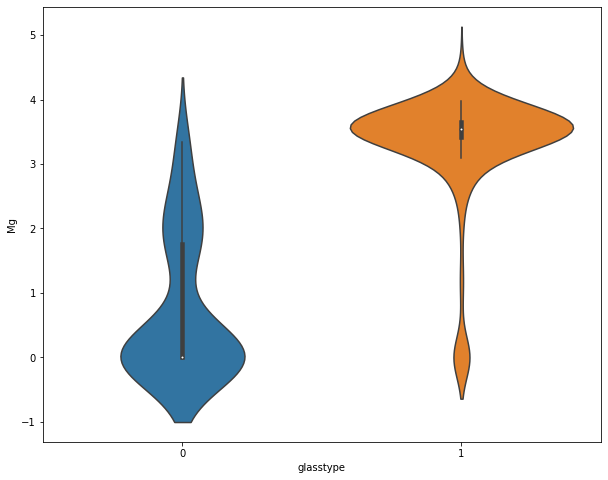

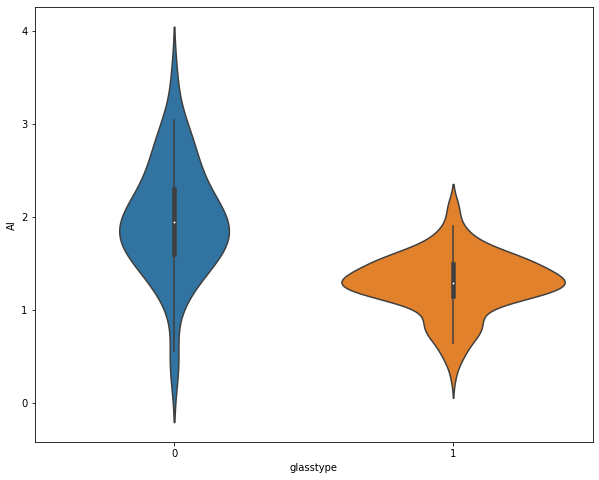

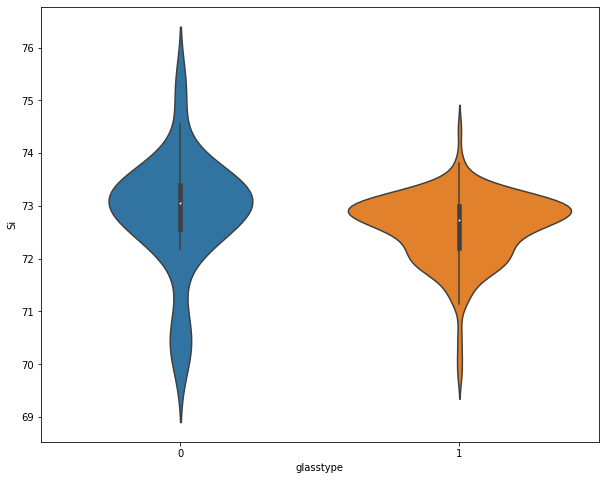

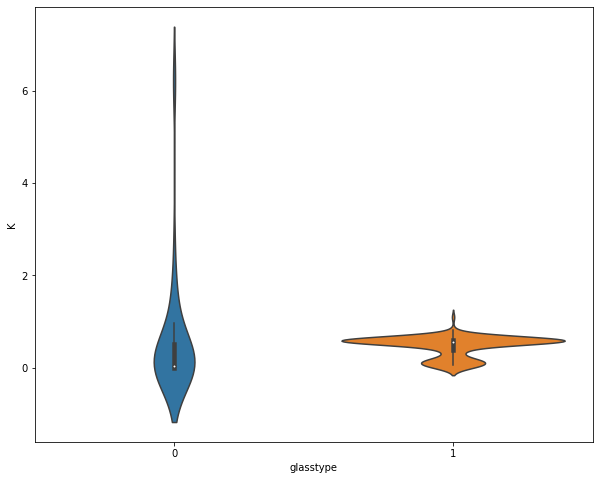

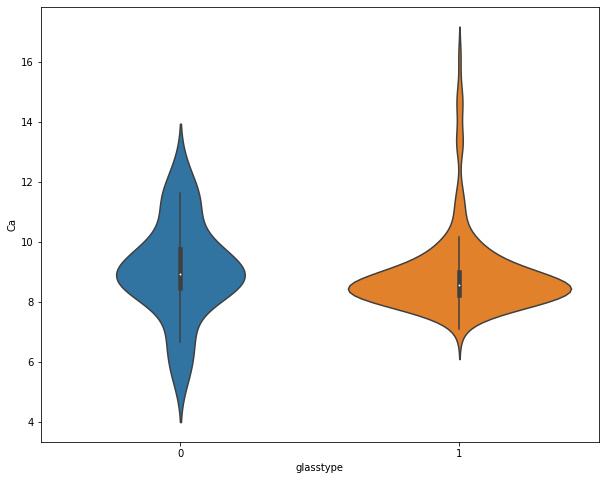

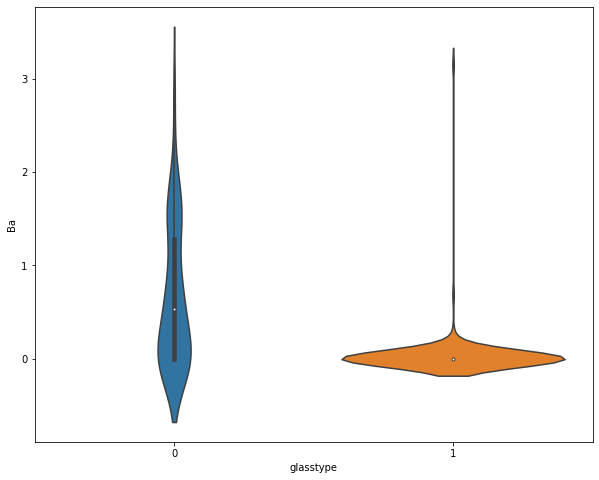

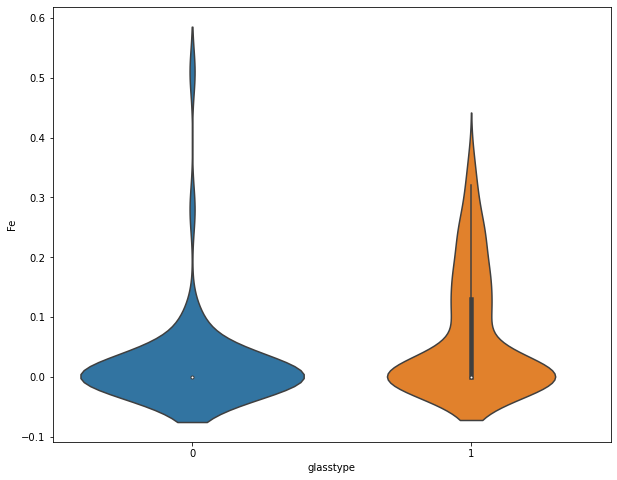

In [37]:
for column in df1.columns:
    if column != "glasstype":
        plt.figure(figsize=(10,8))
        ax = sns.violinplot(x="glasstype", y=column, data=df1)
        plt.show()

<Figure size 720x576 with 0 Axes>

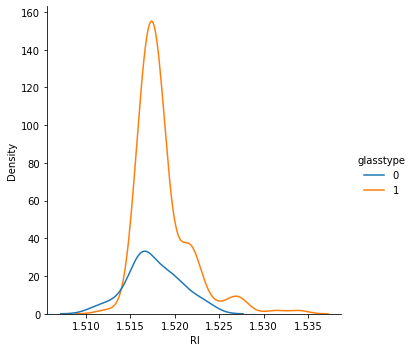

In [38]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="RI", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

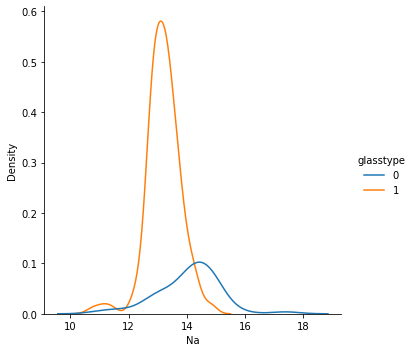

In [39]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Na", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

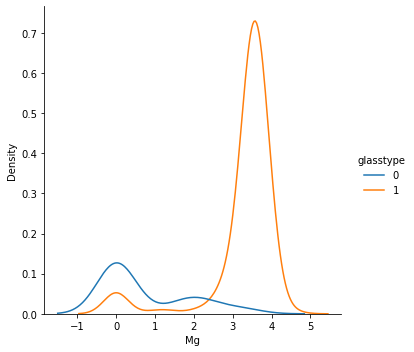

In [40]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Mg", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

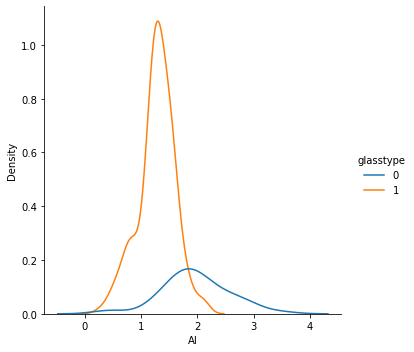

In [41]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Al", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

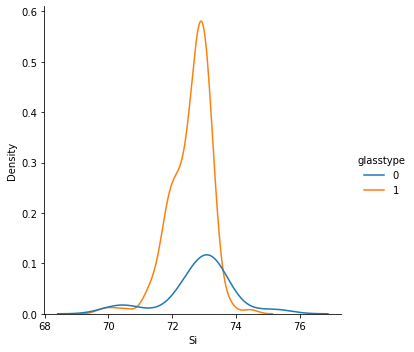

In [42]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Si", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

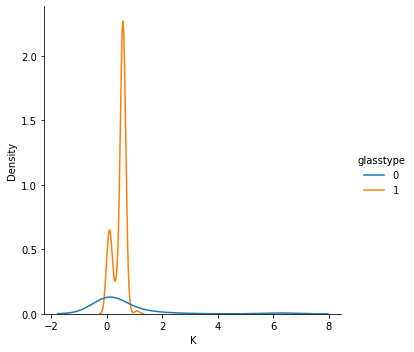

In [43]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="K", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

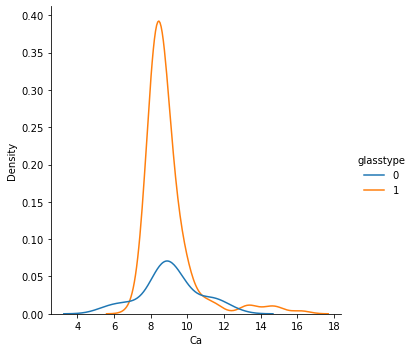

In [44]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Ca", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

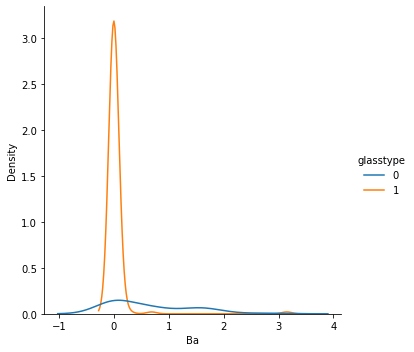

In [45]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Ba", hue='glasstype', kind="kde")

<Figure size 720x576 with 0 Axes>

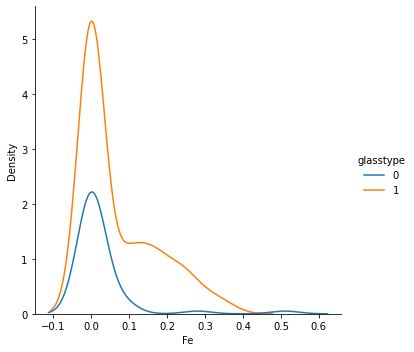

In [46]:
plt.figure(figsize=(10,8))
sns.displot(df1, x="Fe", hue='glasstype', kind="kde")

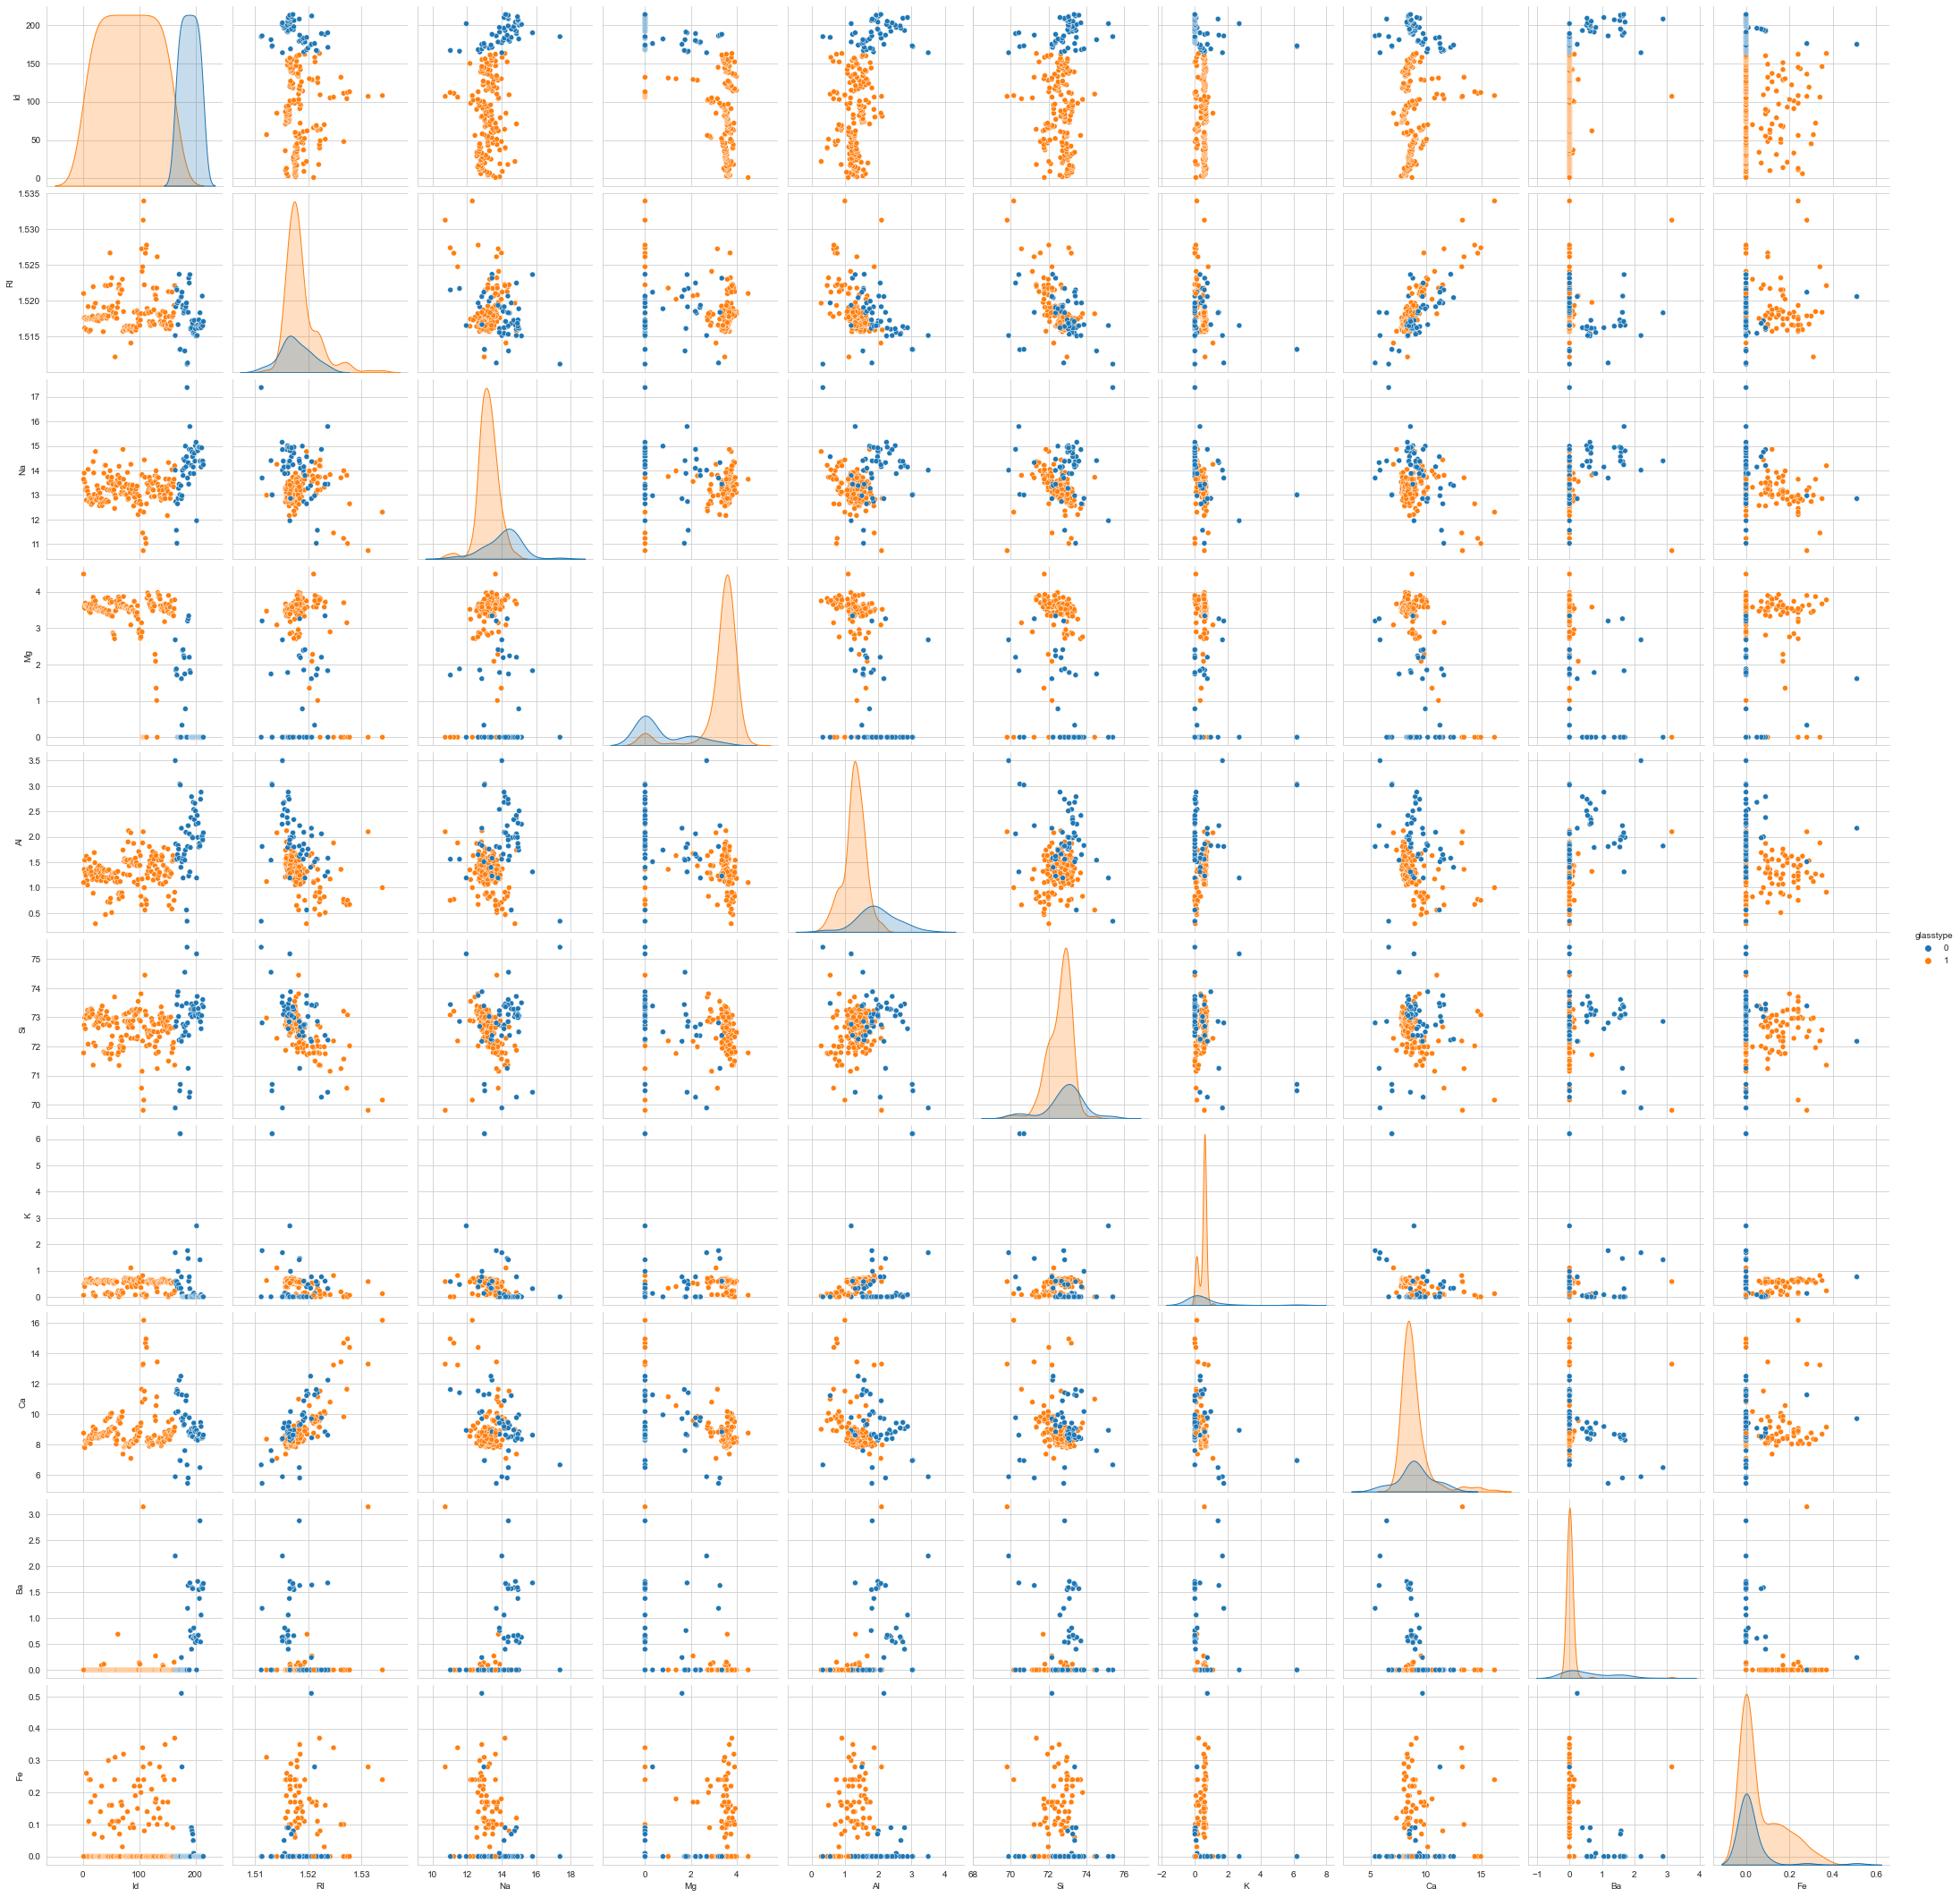

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df1, hue="glasstype", height=3);
plt.show()

- From the above pair plot, we observe that every column is correlated with each other

In [48]:
df1.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glasstype'], dtype='object')

BOX PLOTS BEFORE REMOVING OUTLIERS


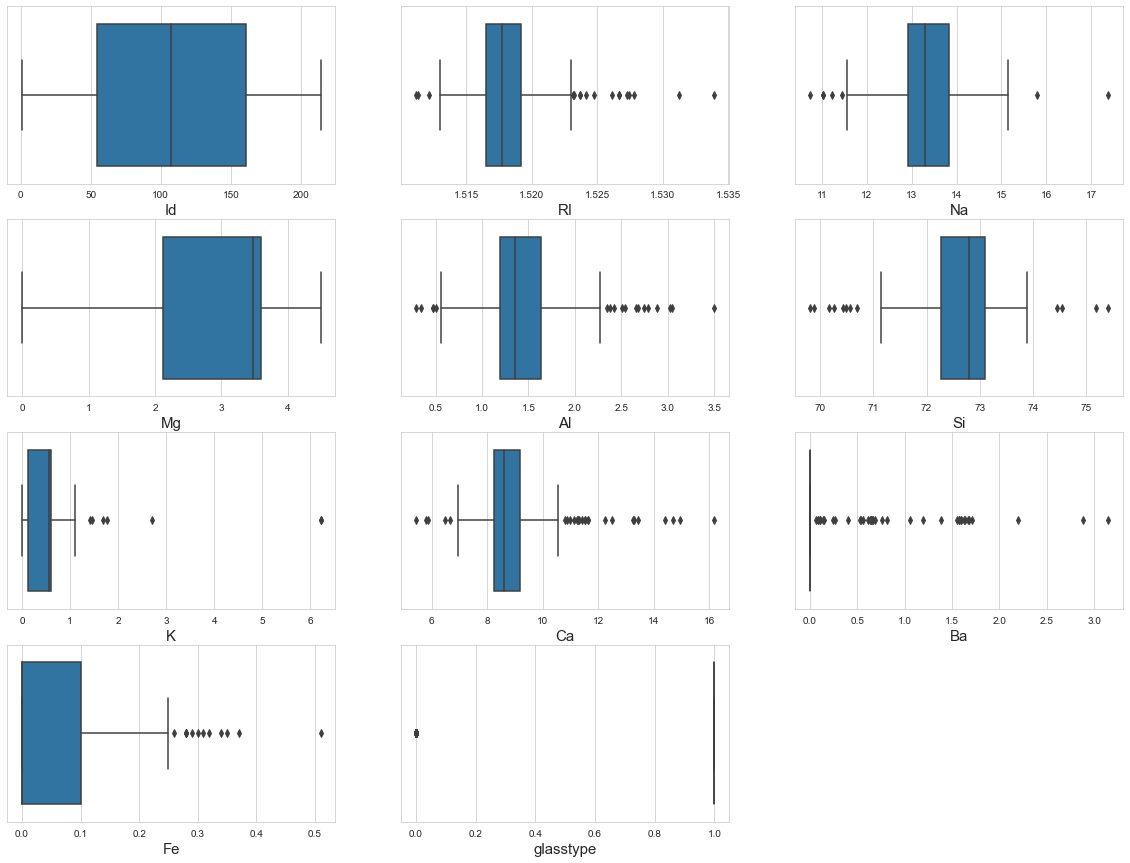

In [49]:
# Boxplots of all the columns
print("BOX PLOTS BEFORE REMOVING OUTLIERS")
plt.figure(figsize=(20,15))
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- From the above plots, we observe that there are outliers in Ri,Na,Al,Si,K,Ca,Fe columns

In [111]:
df1['glasstype'].value_counts()

1    163
0     51
Name: glasstype, dtype: int64

- Before removing the outliers we notice that there are window type and non window type glasses are present.

In [113]:
df1['Ba'].value_counts()

0.00    162
1.57      2
0.64      2
0.09      2
1.59      2
0.11      2
0.15      1
1.67      1
0.61      1
0.63      1
1.06      1
0.67      1
0.53      1
0.56      1
1.38      1
0.81      1
0.69      1
0.14      1
1.55      1
0.76      1
1.71      1
0.54      1
1.63      1
2.20      1
0.24      1
0.40      1
1.64      1
0.06      1
0.66      1
0.27      1
2.88      1
Name: Ba, dtype: int64

- In Ba column, we notice that most of the data is 1 so there are no outliers in Ba column

In [114]:
IQR=df1['Ba'].quantile(0.75)-df1['Ba'].quantile(0.25)
lower_fence=df1['Ba'].quantile(0.25)-IQR
upper_fence=df1['Ba'].quantile(0.75)+IQR
print(IQR,upper_fence,lower_fence)
print(df1['Ba'].quantile(0.25))
print(df1['Ba'].quantile(0.75))

0.0 0.0 0.0
0.0
0.0


- Removing the outliers

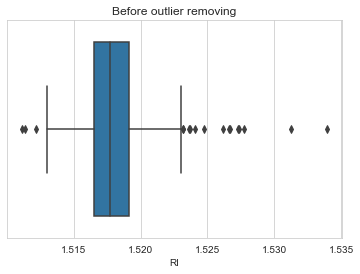

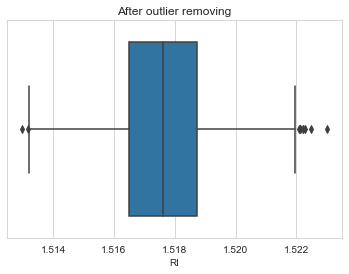

In [112]:
sns.boxplot(df1['RI'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'RI')
sns.boxplot(df1['RI'])
plt.title('After outlier removing')
plt.show()


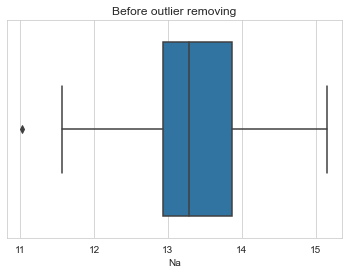

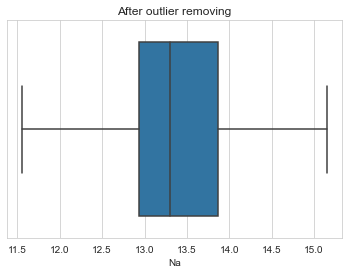

In [115]:
sns.boxplot(df1['Na'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'Na')
sns.boxplot(df1['Na'])
plt.title('After outlier removing')
plt.show()

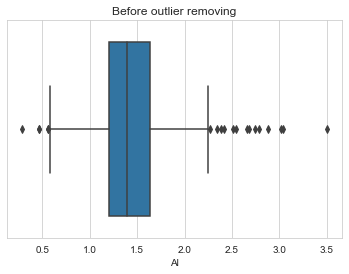

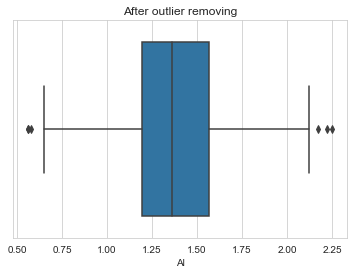

In [116]:
sns.boxplot(df1['Al'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'Al')
sns.boxplot(df1['Al'])
plt.title('After outlier removing')
plt.show()

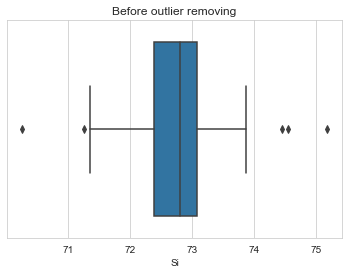

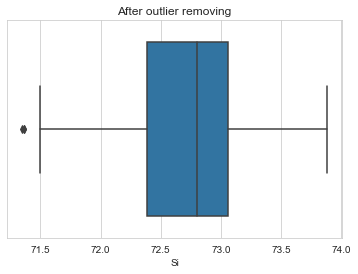

In [117]:
sns.boxplot(df1['Si'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'Si')
sns.boxplot(df1['Si'])
plt.title('After outlier removing')
plt.show()

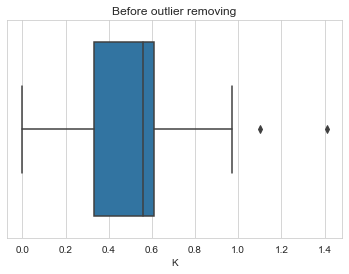

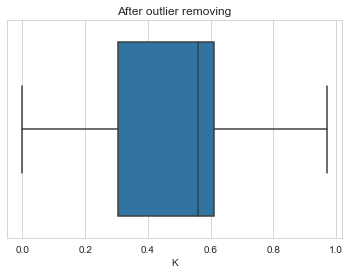

In [118]:
sns.boxplot(df1['K'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'K')
sns.boxplot(df1['K'])
plt.title('After outlier removing')
plt.show()

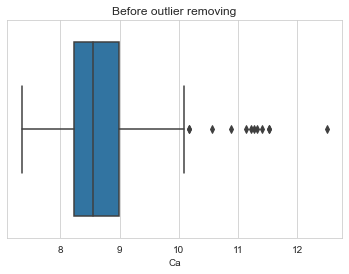

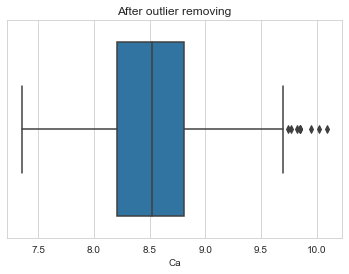

In [119]:
sns.boxplot(df1['Ca'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'Ca')
sns.boxplot(df1['Ca'])
plt.title('After outlier removing')
plt.show()

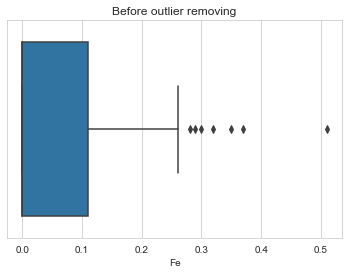

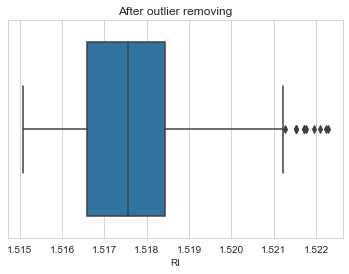

In [120]:
sns.boxplot(df1['Fe'])
plt.title('Before outlier removing')
plt.show()

def drop_outliers(df,column_name):
    iqr=1.5*(np.percentile(df[column_name],75)-np.percentile(df[column_name],25))
    df.drop(df[df[column_name]>(iqr+np.percentile(df[column_name],75))].index,inplace=True)
    df.drop(df[df[column_name]<(np.percentile(df[column_name],25)-iqr)].index,inplace=True)
    return df

df1=drop_outliers(df1,'Fe')
sns.boxplot(df1['RI'])
plt.title('After outlier removing')
plt.show()

- Removed the outliers from the columns

In [121]:
df1['glasstype'].value_counts()

1    136
0     17
Name: glasstype, dtype: int64

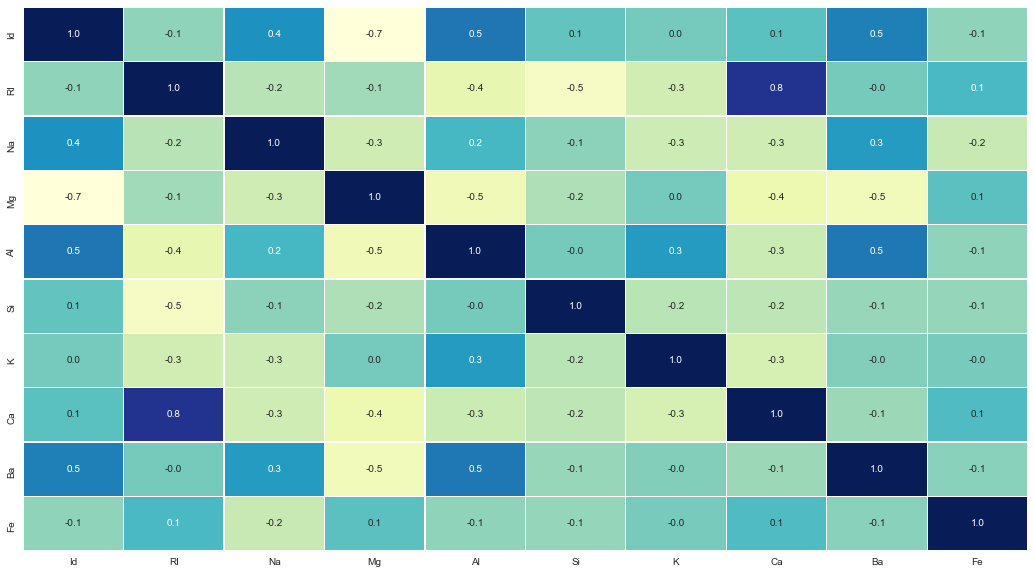

In [52]:
# Pearson Correlation

plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='YlGnBu');

### Building the models

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [55]:
#Splitting the data into train and test
x = df1.drop(['glasstype'], axis=1)
y = df1['glasstype']
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)

In [56]:
y.value_counts()

1    163
0     51
Name: glasstype, dtype: int64

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

In [64]:
#Using Logistic Regression Algorithm to the Training Set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [65]:
#print model accuracy on the training data.
print('Logistic Regression Training Accuracy:', lr.score(x_train, y_train)*100)

Logistic Regression Training Accuracy: 99.41520467836257


In [67]:
cm = confusion_matrix(y_test, lr.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Logistic Regression Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))


[[ 9  1]
 [ 1 32]]
Logistic Regression Testing Accuracy = "0.9534883720930233!"


In [78]:
print('Logistic Regression')
#Check precision, recall, f1-score
print( classification_report(y_test, lr.predict(x_test)) )



Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [73]:
print('Mean square log error:', mean_squared_log_error(y_test, lr.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test, lr.predict(x_test)))
print( confusion_matrix(y_test, lr.predict(x_test),normalize='all'))

Mean square log error: 0.0223466518101489
Mean absolute error: 0.046511627906976744
[[0.20930233 0.02325581]
 [0.02325581 0.74418605]]


### K Nearest Neighbor Classifier

In [74]:
 #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [75]:
#print model accuracy on the training data.
print('K Nearest neighbor Training Accuracy:', knn.score(x_train, y_train)*100)

K Nearest neighbor Training Accuracy: 96.49122807017544


In [77]:
cm = confusion_matrix(y_test, knn.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('K Nearest Neighbor Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[ 8  2]
 [ 0 33]]
K Nearest Neighbor Testing Accuracy = "0.9534883720930233!"


In [79]:
print('K Nearest Neighbor')
#Check precision, recall, f1-score
print( classification_report(y_test, knn.predict(x_test)) )

K Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        33

    accuracy                           0.95        43
   macro avg       0.97      0.90      0.93        43
weighted avg       0.96      0.95      0.95        43



In [80]:
print('Mean square log error:', mean_squared_log_error(y_test, knn.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test, knn.predict(x_test)))
print( confusion_matrix(y_test, knn.predict(x_test),normalize='all'))

Mean square log error: 0.0223466518101489
Mean absolute error: 0.046511627906976744
[[0.18604651 0.04651163]
 [0.         0.76744186]]


#### Random Forest Classifier

In [81]:
#Using RandomForestClassifier method to use Random Forest Classification algorithm
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [82]:
#print model accuracy on the training data.
print('Random Forest Classifier Training Accuracy:', rfc.score(x_train, y_train)*100)

Random Forest Classifier Training Accuracy: 100.0


In [84]:
cm = confusion_matrix(y_test, rfc.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Random Forest Classifier Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[10  0]
 [ 0 33]]
Random Forest Classifier Testing Accuracy = "1.0!"


In [85]:
print('Random Forest Classifier')
#Check precision, recall, f1-score
print( classification_report(y_test, rfc.predict(x_test)) )

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [86]:
print('Mean square log error:', mean_squared_log_error(y_test, rfc.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test,rfc.predict(x_test)))
print( confusion_matrix(y_test, rfc.predict(x_test),normalize='all'))

Mean square log error: 0.0
Mean absolute error: 0.0
[[0.23255814 0.        ]
 [0.         0.76744186]]


#### Decision Tree Classifier

In [87]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [88]:
#print model accuracy on the training data.
print('Decision Tree Classifier Training Accuracy:', dt.score(x_train, y_train)*100)

Decision Tree Classifier Training Accuracy: 100.0


In [89]:
cm = confusion_matrix(y_test, dt.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Decision Tree Classifier Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[10  0]
 [ 0 33]]
Decision Tree Classifier Testing Accuracy = "1.0!"


In [90]:
print('Decision Tree Classifier')
#Check precision, recall, f1-score
print( classification_report(y_test, dt.predict(x_test)) )

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [91]:
print('Mean square log error:', mean_squared_log_error(y_test, dt.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test,dt.predict(x_test)))
print( confusion_matrix(y_test, dt.predict(x_test),normalize='all'))

Mean square log error: 0.0
Mean absolute error: 0.0
[[0.23255814 0.        ]
 [0.         0.76744186]]


#### Naive Bayes

In [93]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
gauss = GaussianNB()
gauss.fit(x_train, y_train)

GaussianNB()

In [94]:
#print model accuracy on the training data.
print(' Naive Bayes Training Accuracy:',gauss.score(x_train, y_train)*100)

 Naive Bayes Training Accuracy: 95.90643274853801


In [95]:
cm = confusion_matrix(y_test, gauss.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print(' Naive Bayes Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[ 9  1]
 [ 1 32]]
 Naive Bayes Testing Accuracy = "0.9534883720930233!"


In [96]:
print(' Naive Bayesr')
#Check precision, recall, f1-score
print( classification_report(y_test, gauss.predict(x_test)) )

 Naive Bayesr
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        33

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43



In [97]:
print('Mean square log error:', mean_squared_log_error(y_test, gauss.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test,gauss.predict(x_test)))
print( confusion_matrix(y_test, gauss.predict(x_test),normalize='all'))

Mean square log error: 0.0223466518101489
Mean absolute error: 0.046511627906976744
[[0.20930233 0.02325581]
 [0.02325581 0.74418605]]


#### Support Vector Classifier

In [98]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
svc = SVC(kernel = 'linear', random_state =0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [99]:
#print model accuracy on the training data.
print('Support Vector Classifier Training Accuracy:',svc.score(x_train, y_train)*100)

Support Vector Classifier Training Accuracy: 100.0


In [100]:
cm = confusion_matrix(y_test, svc.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Support Vector Classifier Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[10  0]
 [ 0 33]]
Support Vector Classifier Testing Accuracy = "1.0!"


In [101]:
print('Support Vector Classifier')
#Check precision, recall, f1-score
print( classification_report(y_test, svc.predict(x_test)) )

Support Vector Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [102]:
print('Mean square log error:', mean_squared_log_error(y_test, svc.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test,svc.predict(x_test)))
print( confusion_matrix(y_test, svc.predict(x_test),normalize='all'))

Mean square log error: 0.0
Mean absolute error: 0.0
[[0.23255814 0.        ]
 [0.         0.76744186]]


#### Ada Boost Classifier

In [106]:
#Using  AdaBoostClassifier of tree class to use Decision Tree Algorithm    
ada = AdaBoostClassifier(n_estimators=2000, random_state = 0)
ada.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=2000, random_state=0)

In [107]:
#print model accuracy on the training data.
print('Ada Boost Classifier Training Accuracy:',ada.score(x_train, y_train)*100)

Ada Boost Classifier Training Accuracy: 100.0


In [108]:
cm = confusion_matrix(y_test, ada.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Ada Boost Classifier Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))

[[10  0]
 [ 0 33]]
Ada Boost Classifier Testing Accuracy = "1.0!"


In [109]:
print('Support Vector Classifier')
#Check precision, recall, f1-score
print( classification_report(y_test, ada.predict(x_test)) )

Support Vector Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        33

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [110]:
print('Mean square log error:', mean_squared_log_error(y_test, ada.predict(x_test)))
print( 'Mean absolute error:',mean_absolute_error(y_test,ada.predict(x_test)))
print( confusion_matrix(y_test, ada.predict(x_test),normalize='all'))

Mean square log error: 0.0
Mean absolute error: 0.0
[[0.23255814 0.        ]
 [0.         0.76744186]]


- Since the data is very small, every model is overfitting
- From all the 7 models that were built, Ada Boost classifier, Support vector classifier, Decision tree classifier, Random Forest classifier models are giving accuracy as 100% so they are overfitting models.
- Logistic Regression gives accuracy of 95.34%
- K Neighbor classifier gives accuracy of 95.3%
- Naive Bayes also gives accuracy of 95.34%
- We consider Logistic Regression model is the best fit model.

#### saving the model

In [122]:
#saving the model
import pickle
filename = 'Typeofglass.pkl'
pickle.dump(lr, open(filename, 'wb'))

#### Conclusion

In [123]:
loaded_model=pickle.load(open('Typeofglass.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

95.34883720930233


In [125]:
y_pred = lr.predict(x_test)

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])

In [126]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
Predicted,0,1,1,0,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,0,1
Original,0,1,1,0,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,0,1
